#  Анализ пользовательского поведения в мобильном приложении. А/А/В тесты.

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 

Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста.


**Цель исследования.**

•	Изучить воронку продаж. 

•	Узнайть, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на       предыдущих шагах? На каких именно?

•	Исследовать результаты A/A/B-эксперимента

**Описание данных**

Каждая запись в логе — это действие пользователя, или события

* **EventName** - название события; 
 
* **DeviceIDHash** — уникальный идентификатор пользователя;,
 
* **EventTimestamp** — время события.

* **ExpId**— номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная

**Ход исследования.**

1.Откроем файл с данными и изучим общую информацию.

2.Подготовка данныx.

3.Изучить и проверить данные.

4.Изучить воронку событий.

5.Изучить результаты эксперимента.

6.Общий вывод.

### Загрузите данные и подготовьте их к анализу.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from plotly import graph_objects as go

import scipy.stats as st
import datetime as dt
import math as mth

In [2]:
df=pd.read_csv('logs_exp.csv',sep='\t')
df.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [4]:
df.duplicated().sum()

413

In [5]:
df.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

#### Вывод 
Открыли фаил, просмотрели содержание стобцов. проверили на дубликаты. Преступаем к обработке.

### Подготовка данныx.

In [6]:
df.columns=['event_name','device_id','timestamp','exp_id'] # преимоновываем столбцы
df.head(5)

,event_name,device_id,timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [7]:
df['date_time']= pd.to_datetime(df['timestamp'],unit='s') #добавляем столбецдаты и времени
df.head(5)

,event_name,device_id,timestamp,exp_id,date_time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42


In [8]:
df['date']=df['date_time'].dt.date # добовляем столбец даты
df.head(5)


,event_name,device_id,timestamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   device_id   244126 non-null  int64         
 2   timestamp   244126 non-null  int64         
 3   exp_id      244126 non-null  int64         
 4   date_time   244126 non-null  datetime64[ns]
 5   date        244126 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB


In [10]:
df['date']=df['date'].astype('datetime64') # преобразовываем тип столбца date
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   device_id   244126 non-null  int64         
 2   timestamp   244126 non-null  int64         
 3   exp_id      244126 non-null  int64         
 4   date_time   244126 non-null  datetime64[ns]
 5   date        244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


In [11]:
df=df.drop_duplicates()  # удаляем дубликаты, процент потери маленький можно спокойно удалить.
df=df.reset_index(drop=True)
df

,event_name,device_id,timestamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
243709,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
243710,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
243711,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


#### Вывод.
*В ходе обработки были добавлены столбцы date, и date_time. Заменены названия столбцов. Удалены дубликаты. Изменен тип данных в столбце date.*

### Изучить и проверить данные.

#### Кол-во событий в логе.

In [12]:
count_events=df['event_name'].count()
print('Всего кол-во событий в логе',  count_events)
print(df['event_name'].value_counts())

Всего кол-во событий в логе 243713
MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64


#### Кол-во пользоватей в логе.

In [13]:
users=df['device_id'].nunique()
print('Всего пользователе в логе',users)

Всего пользователе в логе 7551


#### Сколько в среднем событий приходится на пользователя?

In [14]:
print('Средне кол-во событий  на ползователя=', (count_events/users).round())

Средне кол-во событий  на ползователя= 32.0


In [15]:
cnt_us_ev=df.groupby('device_id')['event_name'].count()
cnt_us_ev.describe()

count    7551.000000
mean       32.275593
std        65.154219
min         1.000000
25%         9.000000
50%        20.000000
75%        37.000000
max      2307.000000
Name: event_name, dtype: float64

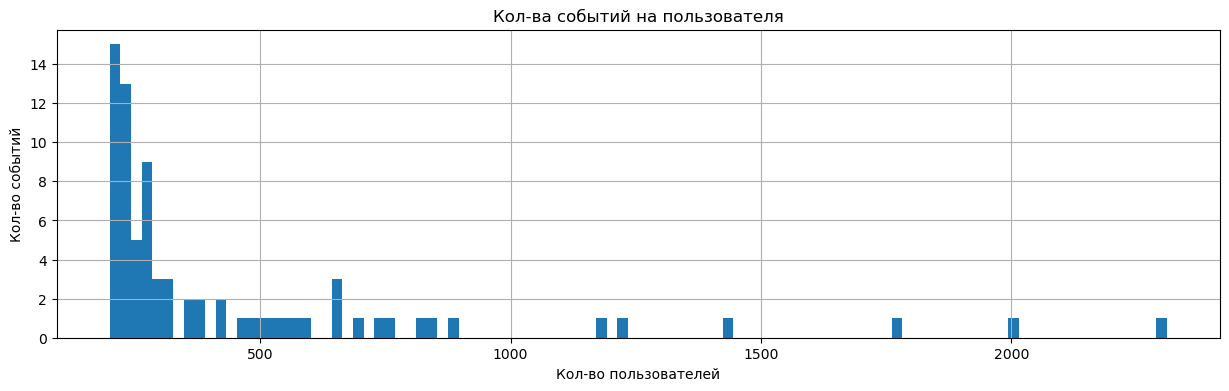

In [16]:
plt.figure(figsize=(15,4))
plt.hist(cnt_us_ev, bins=100, range=(200,2310)) 
plt.xlabel('Кол-во пользователей')
plt.grid()
plt.ylabel('Кол-во событий')
plt.title('Кол-ва событий на пользователя');

*На гистограмме видно, что есть множество выбросов, что влияет на показания среднего, лучше взять медианное значение. Медианное значение  кол-во событий на пользователя =20*


#### Изучить временной период.

In [17]:
display(df['date'].min(),df['date'].max())
print(f"Приод:{df['date'].max()- df['date'].min()}")

Timestamp('2019-07-25 00:00:00')

Timestamp('2019-08-07 00:00:00')

Приод:13 days 00:00:00


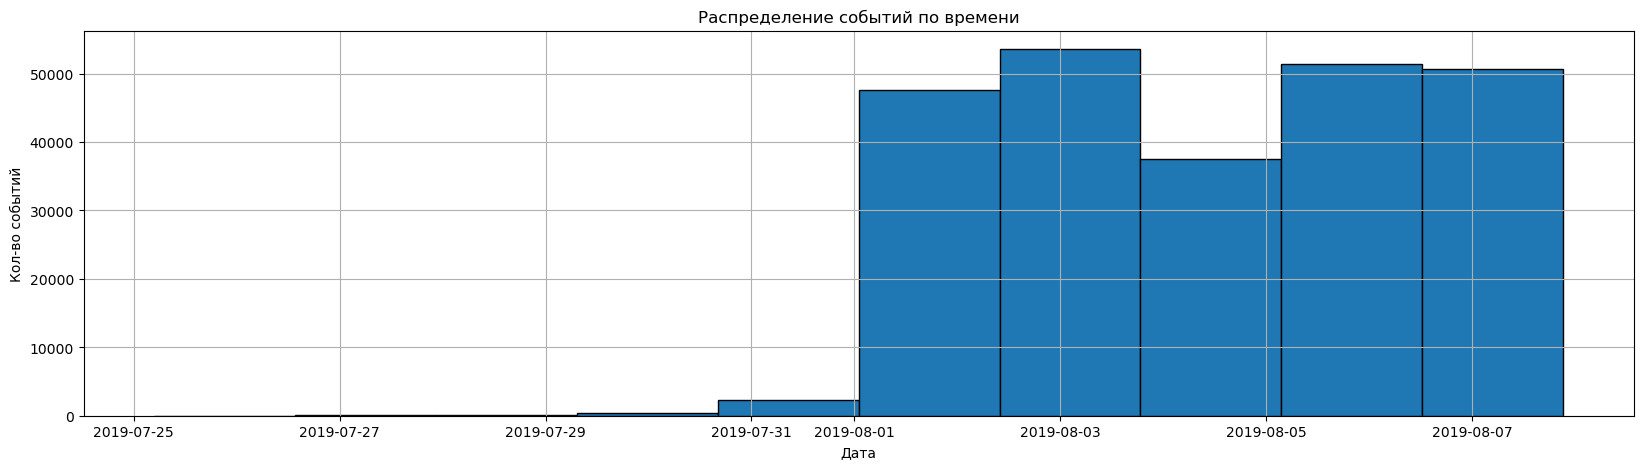

In [18]:
plt.figure(figsize=(20,5))
plt.grid()
df['date_time'].hist(edgecolor='black')
plt.xlabel('Дата')
plt.ylabel('Кол-во событий')
plt.title('Распределение событий по времени');
plt.show();


*На гистограмме видно что начало месяца данных было мало (возможно их не собирали) с 1 августа данных стало больше, посмотрим распределение если убрать начало месяца.*

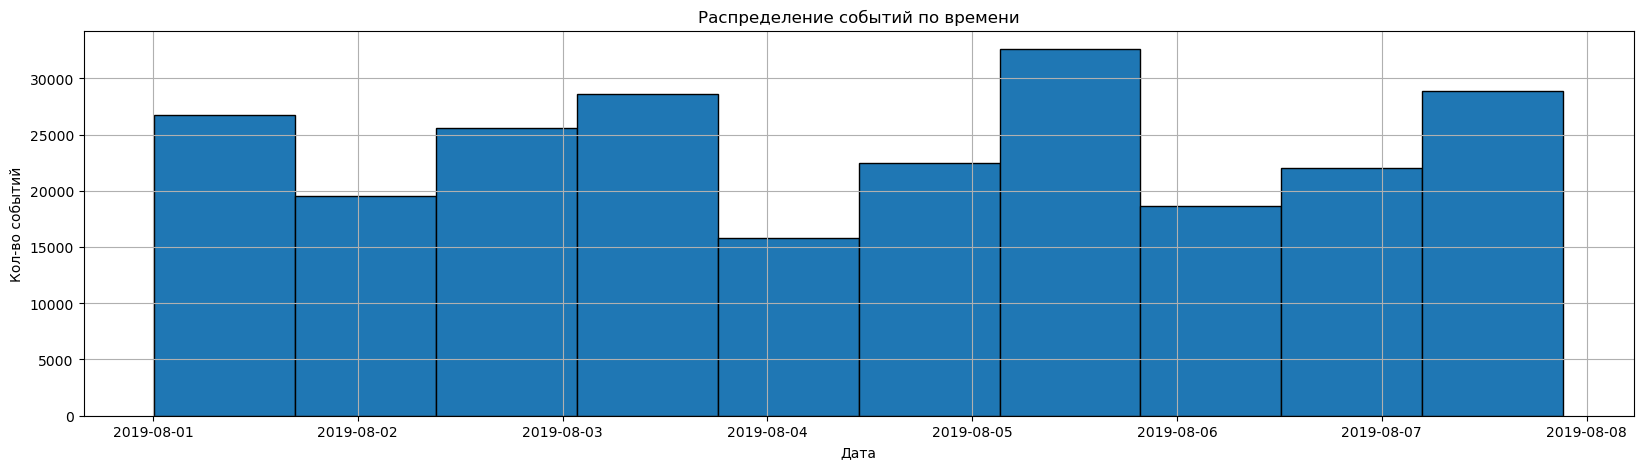

In [19]:
df_new=df.loc[df['date_time']>'2019-08-01']
plt.figure(figsize=(20,5))
plt.grid()
df_new['date_time'].hist(edgecolor='black')
plt.xlabel('Дата')
plt.ylabel('Кол-во событий')
plt.title('Распределение событий по времени');

plt.show();

*С 1 августа у нас плотные данные. Первую неделю можно отбросить. Будем считать что у нас есть данные с 1 по 7 августа*

In [20]:
df=df.loc[df['date_time']>'2019-08-1'].reset_index(drop=True) # удаляем данные за первую неделю.
df.sort_values(by='date_time')

,event_name,device_id,timestamp,exp_id,date_time,date
0,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
1,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
3,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
4,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
240882,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
240883,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
240884,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
240885,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [21]:
new_users=df['device_id'].nunique()
loss_users=users-new_users
print('Кол-во потерянных пользователй',loss_users)
print('Процент потери пользователей',round((users-new_users)/users*100,2))

new_count_events=df['event_name'].count()
loss_event=count_events-new_count_events
print('Кол-во потерянных событий',loss_event)
print('Процент потри событий',round((count_events-new_count_events)/count_events*100,2))

Кол-во потерянных пользователй 17
Процент потери пользователей 0.23
Кол-во потерянных событий 2826
Процент потри событий 1.16


**Убрав данные с 25 июля по 1 августа. Мы потеряли  9 поьзователй(0.23% от общей массы) и 796 событий(1.16% от общей массы). Это не значительные  потери.**

#### Проверка эксперементальных групп.

In [22]:
df['exp_id'].value_counts()

248    84563
246    79302
247    77022
Name: exp_id, dtype: int64

In [23]:
df.groupby('exp_id')['device_id'].nunique()

exp_id
246    2484
247    2513
248    2537
Name: device_id, dtype: int64

In [24]:
df.groupby('device_id').agg({'exp_id':'nunique'}).query('exp_id>1').count()



exp_id    0
dtype: int64

*Пользователи разделены между группы практически равномерно. Проверили чтоб группах не было одних и тех же пользователей*

#### Вывод.
*Рассмотрев за какой период нам предоставлены данные (25.07.2019-07.08.2019). Определили, что до 1 августа данные собирались плохо и эти данные для нас не пригодны. Для дальнейшего исследования берем данные начиная с 1 августа. После удаления первой недели мы потеряли 0.12% пользователей и 0.33% событий, что не очень большая потеря для общей массы. Проверили чтоб в данных не было пользователей, которые учувствуют во всех трех группах. Распределение между группами практически равномерно около 2500 тыс., а событий примерно по 80 тыс.*

### Изучить воронку событий.

#### Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [25]:
 df['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

**Название событий и распределение по частоте**

1.Появление главного экрана - MainScreenAppear 

2.Появление экрана предложений - OffersScreenAppear

3.Появление экрана корзины - CartScreenAppear 

4.Экран оплата успешна - PaymentScreenSuccessful

5.Руководство - Tutorial 



#### Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

In [26]:
event_id=df.groupby('event_name').agg({'event_name':'count','device_id': 'nunique'}).sort_values(by='device_id',ascending=False)
event_id.columns=['count_event','count_id']
event_id['id_p_event']=round(event_id['count_id']/new_users*100,1)
event_id

,count_event,count_id,id_p_event
event_name,,,
MainScreenAppear,117328,7419,98.5
OffersScreenAppear,46333,4593,61.0
CartScreenAppear,42303,3734,49.6
PaymentScreenSuccessful,33918,3539,47.0
Tutorial,1005,840,11.1


**'count_event'- кол-во событий**

**'count_id'- кол-во пользователй**

**'id_p_event'-  доля пользователей совершившее хотябы одно событие.**

Построим воронку  порядка событий  по числу  вользователй совершивших каждое из событий.

In [40]:
fig = go.Figure(go.Funnel(
    y = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful','Tutorial'],
    x = [98.5, 61.1, 49.6, 47, 11.1]))
fig.update_layout(title="Воронка цепочки событий использования мобильного приложения")
fig.show()



**Cудя по всему  события происходят в порядке**

1.Появление главного экрана - MainScreenAppear 

2.Появление экрана предложений - OffersScreenAppear

3.Появление экрана корзины - CartScreenAppear 

4.Экран оплата успешна - PaymentScreenSuccessful

5.Руководство - Tutorial 

*Все они выстроены в последовательную цепочку, кроме Tutorial , это руководство пользователя до него доходит очень маленький процент пользователей, и он скорее всего вряд ли влияет на свершение покупки. Его можно либо исключить или просто не учитывать в последующем анализе.*

#### По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки .

In [28]:
event_id_n= event_id.query('event_name!="Tutorial"').sort_values(by='count_id',ascending=False)
event_id_n #  исключили Tutorial

,count_event,count_id,id_p_event
event_name,,,
MainScreenAppear,117328,7419,98.5
OffersScreenAppear,46333,4593,61.0
CartScreenAppear,42303,3734,49.6
PaymentScreenSuccessful,33918,3539,47.0


In [29]:
event_id_n['conv']=round(event_id_n['count_id']/event_id['count_id'].shift()*100,1).fillna(100)
event_id_n
# % доля перехода на след шаг 

,count_event,count_id,id_p_event,conv
event_name,,,,
MainScreenAppear,117328,7419,98.5,100.0
OffersScreenAppear,46333,4593,61.0,61.9
CartScreenAppear,42303,3734,49.6,81.3
PaymentScreenSuccessful,33918,3539,47.0,94.8


**Построим воронку- какой % пользователей перешел на след этап оносительно предыдущего**

In [30]:
fig = go.Figure(go.Funnel(
    y = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'],
    x = [100,61.9,81.3,94.8]))
fig.update_layout(title="Воронка пользователей перешедших на след этап оносительно предыдущего")
fig.show()

 #### Вывод
Было принято исключить Tutorial из воронки (он несет никакой пользы). 

**Посчитали долю пользователей, проходящих с каждого этапа к следующему.** 

* MainScreenAppear-OffersScreenAppear= **62%** потеря составляет **38 %** (очень большая, нужно искать причину возможно ошибки в работе приложения)

* OffersScreenAppear-CartScreenAppear = **81%** потеря **29%** 

* CartScreenAppear-PaymentScreenSuccessful = **94%** потеря составляет **6%**

* От первого события до оплаты доходит **47%**  пользователей



### Изучить результаты эксперимента.

#### Колличество пользователей в каждой эксперемнтальной группе

In [31]:
df.groupby('exp_id')['device_id'].nunique()

exp_id
246    2484
247    2513
248    2537
Name: device_id, dtype: int64

**246 и 247 — контрольные группы, а 248 — экспериментальная.**

Запишем кол-во пользователй для каждой группы в таблицу

In [32]:
users_by_group = df.groupby('exp_id')['device_id'].nunique()
users_by_group['246+247'] = users_by_group[246] + users_by_group[247]
users_by_group

exp_id
246        2484
247        2513
248        2537
246+247    4997
Name: device_id, dtype: int64

**Создадим таблицу  с числом пользователей в воронке идущей по всем этампам и по всем группам ( и их долю от общего числа)
Событие Tutorial было исключенно**

In [33]:
event_test= df[df['event_name']!='Tutorial'].pivot_table(
  index='event_name',
  columns='exp_id',
  values='device_id',
  aggfunc='nunique').sort_values(by=246,ascending=False)
event_test=event_test.reset_index()
display(event_test)

event_test['246+247']= event_test[246]+event_test[247]
event_test['ratio_246']= round(event_test[246]/users_by_group[246]*100,1)
event_test['ratio_247']= round(event_test[247]/users_by_group[247]*100,1)
event_test['ratio_248']= round(event_test[248]/users_by_group[248]*100,1)
event_test['ratio_246+247']= round((event_test[246]+event_test[247])/(users_by_group[246]+users_by_group[247])*100,1)
event_test

exp_id,event_name,246,247,248
0,MainScreenAppear,2450,2476,2493
1,OffersScreenAppear,1542,1520,1531
2,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181


exp_id,event_name,246,247,248,246+247,ratio_246,ratio_247,ratio_248,ratio_246+247
0,MainScreenAppear,2450,2476,2493,4926,98.6,98.5,98.3,98.6
1,OffersScreenAppear,1542,1520,1531,3062,62.1,60.5,60.3,61.3
2,CartScreenAppear,1266,1238,1230,2504,51.0,49.3,48.5,50.1
3,PaymentScreenSuccessful,1200,1158,1181,2358,48.3,46.1,46.6,47.2


In [34]:
df['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

**Самое популярное событие MainScreenAppear**

**Число пользователей, совершивших это событие в каждой из контрольных групп**

* *246-2450*

* *247-2476*

* *248-2493*

**Доля пользователей, совершивших это событие.**

* *246-98,6%*

* *247-98,5%*

* *248-98,3%*


**Выведем основную и альтернативную гипотезы для всех парных сравнений:**

**Н0**- доли уникальных пользователей побывавших на этапе воронки одинаковы

**Н1**- доли уникальных пользователей побывавших на этапе воронки отличаются

А/В тест
Перед тем как начать A/B-тест:

* на результаты не влияют аномалии и выбросы в генеральной совокупности;

* инструмент «деления» трафика работает безошибочно;

* данные отправляются в системы аналитики корректно.


** Группа 246 и 247  должны быть одинаковыми**

*Несколько сравнений, проводимых на одних и тех же данных — это множественный тест. Его важная особенность в том, что с каждой новой проверкой гипотезы растёт вероятность ошибки первого рода.  применяем метод корректировки уровня значимости Метод Шидака.*

In [35]:
alpha1=1-(1-0.05)**(1/16)# допустимая вероятность ложноположительного результата хотя бы в одном из тестов  при (alpha=0.005) 
print("Вероятность увидеть случайно разницу, даже если ee нет, в 16 тестaх",alpha1)

Вероятность увидеть случайно разницу, даже если ee нет, в 16 тестaх 0.0032006977101884937


In [36]:
def z_test(group1, group2, alpha):
    for i in event_test.index:
        p1 = event_test[group1][i] / users_by_group[group1]
        # пропорция успехов во второй группе:
        p2 = event_test[group2][i] / users_by_group[group2]
        # пропорция успехов в комбинированном датасете:
        p = ((event_test[group1][i] + event_test[group2][i]) / 
                      (users_by_group[group1] + users_by_group[group2]))
        # разница пропорций в датасетах
        difference = p1 - p2
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p * (1 - p) * 
                                        (1/users_by_group[group1] + 1/users_by_group[group2]))
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(event_test['event_name'][i], p_value))
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        else:
            print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        print('')
        
z_test(246, 247, 0.003)

MainScreenAppear p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



**По результатам тестирования для всех событий разница не оказалась значимой, эти группы считаем контрольными**


#### 246/248 - эксперемент


In [37]:
z_test(246,248,0.003)

MainScreenAppear p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



#### 247/248 - эксперемент

In [38]:
z_test(247,248,0.003)

MainScreenAppear p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



#### 246+247/248 - эксперемент

In [39]:
z_test('246+247',248,0.003)

MainScreenAppear p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



#### Вывод 
**Вывод: Значимой разницы между группами во всех тестах не выявлено.**

### Общий вывод.

* В ходе обработки были добавлены столбцы date и date_time. Заменены названия столбцов. Удалены дубликаты. Изменен тип данных в столбце date.
 
* Всего кол-во событий в логе 240887

* Всего пользователе в логе 7534

* Средне кол-во событий на пользователя= 32., но так как много вбросов лучше взять медианное значение 20.

* При рассмотрение временного периода было обнаружено что в первую неделю данные собирались плохо либо не собирались во все. Принято решение для дальнейшего анализа оставить данные начиная с 1 августа по 7 августа. При удаление первой недели было потерянно 0,23% пользователей и 1,16% событий.

* Проверили чтоб в данных не было пользователей, которые учувствуют во всех трех группах. Распределение между группами практически равномерно около 2500 тыс., а событий примерно по 80 тыс.

* Самое популярное событие MainScreenAppear, событие, которое реже всего используют пользователи Tutorial. Так как он не несет практической пользы было принято решение исключить его из дальнейшего анализа.

* События происходят в порядке

1.Появление главного экрана - MainScreenAppear

2.Появление экрана предложений - OffersScreenAppear

3.Появление экрана корзины - CartScreenAppear

4.Экран оплата успешна - PaymentScreenSuccessful

5.Руководство - Tutorial


* Посчитали долю пользователей, проходящих с каждого этапа к следующему. MainScreenAppear-OffersScreenAppear= 62% потеря составляет 38 % (очень большая, нужно искать причину возможно ошибки в работе приложения) OffersScreenAppear-CartScreenAppear = 81% потеря 29% CartScreenAppear-PaymentScreenSuccessful = **94% потеря составляет 6%
* От первого события до оплаты доходит 47% пользователей

* В ходе и A/A/B-теста было проведено 16 экспериментов:
  * 246/247 - 4 эксперимента (для каждого события) / уровень статистической значимости - 1%
  * 246/248 - 4 эксперимента (для каждого события) / уровень статистической значимости - 5%
  * 247/248 - 4 эксперимента (для каждого события) / уровень статистической значимости - 5%
  * 246+247/248 - 4 эксперимента (для каждого события) / уровень статистической значимости - 5%
**246 и 247 — контрольные группы, а 248 — экспериментальная.**

Группа 246 и 247 должны быть одинаковыми, то для этих групп уровень статистической значимости 1%. (более жесткий контроль). Для всех остальных тестов выберем стандартный уровень статистической значимости равный 5%, так как не нужна высокая точность.

* В результате всех и каждого A/A/B эксперемента значимой разницы между группами не выявлено. Поэтому можно утверждать, что на поведение пользователей изменение шрифта значимого эффекта не оказало. Тестирование можно назвать успешным - изменение шрифта не повлияло на поведение пользователей.
